[Problem Description](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/25/)

# Data overview & preprocessing

In [ ]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 50)

In [ ]:
X = pd.read_csv("../content/train.csv")
y = pd.read_csv("../content/train_labels.csv")
T = pd.read_csv("../content/test.csv")
df = pd.concat([X, T])

*Let's take a closer look at the input features:*

**amount_tsh** - Total static head (amount water available to waterpoint)

**date_recorded** - The date the row was entered

**funder** - Who funded the well

**gps_height** - Altitude of the well

**installer** - Organization that installed the well

**longitude** - GPS coordinate

**latitude** - GPS coordinate

**wpt_name** - Name of the waterpoint if there is one

**num_private** - p.s. it is some class-oriented feature

**basin** - Geographic water basin

**subvillage** - Geographic location

**region** - Geographic location

**region_code** - Geographic location (coded)

**district_code** - Geographic location (coded)

**lga** - Geographic location

**ward** - Geographic location

**population** - Population around the well

**public_meeting** - True/False

**recorded_by** - Group entering this row of data

**scheme_management** - Who operates the waterpoint

**scheme_name** - Who operates the waterpoint

**permit** - If the waterpoint is permitted

**construction_year** - Year the waterpoint was constructed

**extraction_type** - The kind of extraction the waterpoint uses

**extraction_type_group** - The kind of extraction the waterpoint uses

**extraction_type_class** - The kind of extraction the waterpoint uses

**management** - How the waterpoint is managed

**management_group** - How the waterpoint is managed

**payment** - What the water costs

**payment_type** - What the water costs

**water_quality** - The quality of the water

**quality_group**- The quality of the water

**quantity** - The quantity of water

**quantity_group** - The quantity of water

**source** - The source of the water

**source_type** - The source of the water

**source_class** - The source of the water

**waterpoint_type** - The kind of waterpoint

**waterpoint_type_group** - The kind of waterpoint

In [ ]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [ ]:
df.nunique()

id                       74250
amount_tsh                 102
date_recorded              369
funder                    2140
gps_height                2456
installer                 2410
longitude                71870
latitude                 71869
wpt_name                 45684
num_private                 68
basin                        9
subvillage               21425
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2098
population                1128
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2868
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_

To begin with, let's take a detailed look at the dataset
It can be seen that most of the featuress are categorical, and from some it is possible to make their derivatives without loss of information. For example:

In [ ]:
def categorial_preprocessing(X):
    X = X.drop(["id"], axis = 1)
    X["company"] = (X["funder"] == X["installer"])
    X["extraction"] = X["extraction_type"] + X["extraction_type_group"] + X["extraction_type_class"]
    X["water"] = X["water_quality"] + X["quality_group"]
    X["quantity"] = X["quantity"] + X["quantity_group"]
    X["source"] = X["source_type"] + X["source_class"]
    X["waterpoint"] = X["waterpoint_type"] + X["waterpoint_type_group"]
    X["manage"] = X["management"] + X["management_group"]

    X["interval"] = pd.DatetimeIndex(X['date_recorded']).year - X["construction_year"]

    X = X.drop(["management", "management_group", "funder", "installer", "extraction_type", "extraction_type_group", "extraction_type_class", "water_quality", "quality_group", "quantity_group", "source_type", "source_class", "waterpoint_type", "waterpoint_type_group"], axis = 1)
    # then we will use only numerical and derivatives features fo training
    X = X[["manage", "company", "interval", "amount_tsh", "gps_height", "longitude", "latitude", "num_private", "population", "public_meeting", "quantity", "source", "extraction", "water", "waterpoint"]]
    return X

In [ ]:
df = categorial_preprocessing(df)

In [ ]:
df.nunique()

manage               12
company               2
interval             65
amount_tsh          102
gps_height         2456
longitude         71870
latitude          71869
num_private          68
population         1128
public_meeting        2
quantity              5
source                7
extraction           18
water                 8
waterpoint            7
dtype: int64

In [ ]:
df.head(3)

,manage,company,interval,amount_tsh,gps_height,longitude,latitude,num_private,population,public_meeting,quantity,source,extraction,water,waterpoint
0,vwcuser-group,True,12,6000.0,1390,34.938093,-9.856322,0,109,True,enoughenough,springgroundwater,gravitygravitygravity,softgood,communal standpipecommunal standpipe
1,wuguser-group,False,3,0.0,1399,34.698766,-2.147466,0,280,NaN,insufficientinsufficient,rainwater harvestingsurface,gravitygravitygravity,softgood,communal standpipecommunal standpipe
2,vwcuser-group,False,4,25.0,686,37.460664,-3.821329,0,250,True,enoughenough,damsurface,gravitygravitygravity,softgood,communal standpipe multiplecommunal standpipe


In [ ]:
categoracal_columns = ["manage", "company", "num_private", "public_meeting",	"quantity",	"source",	"extraction",	"water",	"waterpoint"]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

encoded_features_train = pd.DataFrame(ohe.fit_transform(df[categoracal_columns]))

df.drop(categoracal_columns, axis=1, inplace=True)

df = pd.concat([df.reset_index(), encoded_features_train.reset_index()], axis=1)

df = df.drop(['index'], axis=1)

print(X.shape[1], "-->", df.shape[1])

40 --> 136


In [ ]:
from sklearn.preprocessing import MinMaxScaler

num_features = ["interval", "amount_tsh",	"gps_height",	"longitude",	"latitude",	"population"]

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[num_features])

df[num_features] = scaler.transform(df[num_features])

In [ ]:
y = y["status_group"]

In [ ]:
y.unique()

array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

In [ ]:
print("Class 1: {}%".format(np.count_nonzero(y.where(y == 'functional').dropna())/y.shape[0]), "\n", "Class 2: {}%".format(np.count_nonzero(y.where(y == 'non functional').dropna())/y.shape[0]), "\n", "Class 3: {}%".format(np.count_nonzero(y.where(y == 'functional needs repair').dropna())/y.shape[0]))

Class 1: 0.543080808080808% 
 Class 2: 0.3842424242424242% 
 Class 3: 0.07267676767676767%


## Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.concat([df, y], axis = 1)
data.head()

,interval,amount_tsh,gps_height,longitude,latitude,population,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,...,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,status_group
0,0.009406,0.017143,0.516219,0.865979,0.153923,0.003574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,functional
1,0.004950,0.000000,0.519358,0.860047,0.815659,0.009180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,functional
2,0.005446,0.000071,0.270666,0.928504,0.671973,0.008197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,functional
3,0.016832,0.000000,0.123125,0.953922,0.042418,0.001902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,non functional
4,0.999010,0.000000,0.031392,0.771612,0.843309,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,functional


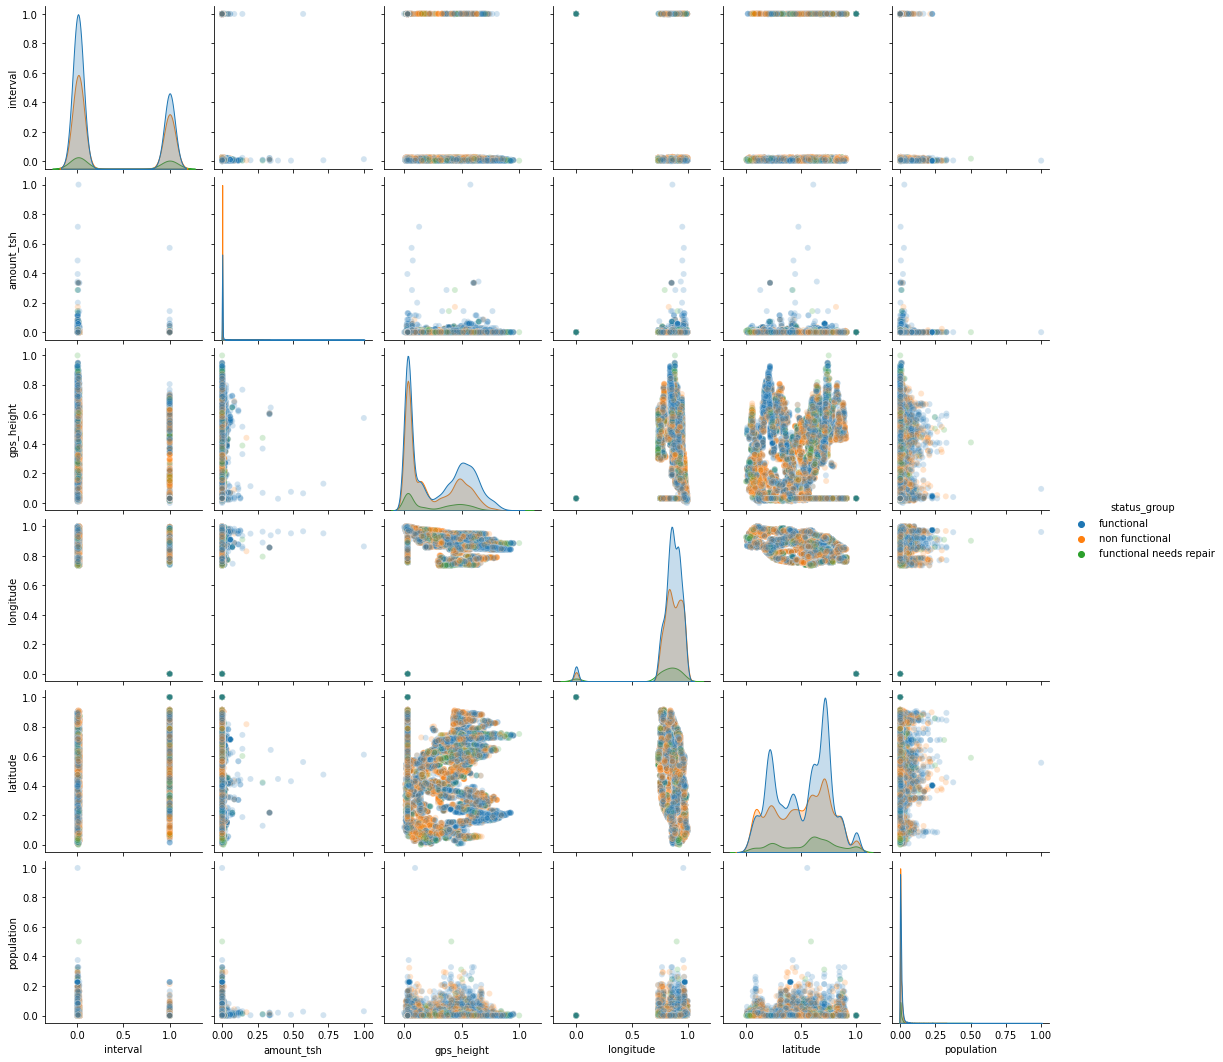

In [ ]:
sns.pairplot(data[["interval",	"amount_tsh",	"gps_height",	"longitude",	"latitude",	"population", 'status_group']], hue = 'status_group', kind='scatter', plot_kws=dict(alpha=0.2))

# Model

In [ ]:
X_train = df.iloc[:X.shape[0]]
X_test = df.iloc[X.shape[0]:]

## GridSearch

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [ ]:
parameters_knn = {"n_neighbors": np.arange(5, 50, 5), "weights": ["uniform", "distance"], "p" : np.arange(1, 4)}

knn = GridSearchCV(KNeighborsClassifier(), parameters_knn, scoring=make_scorer(roc_auc_score))
knn.fit(X_train, y)

n_neighbors, weights, p = knn.best_params_

## Final

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

skf = StratifiedKFold(n_splits=5)
roc_auc = []

for train_index, test_index in skf.split(X_train, y):
    X_trn, X_tst = X_train.iloc[train_index], X_train.iloc[test_index]
    y_trn, y_test = y[train_index], y[test_index]
    model = KNeighborsClassifier(n_neighbors = 20, weights = "uniform", p = 1)
    model.fit(X_trn, y_trn)
    y_pred = model.predict_proba(X_tst)
    roc_auc.append(roc_auc_score(y_test, y_pred, average='weighted', multi_class="ovr"))
print("Final roc_auc_score %0.3f" % np.array(roc_auc).mean())

Final roc_auc_score 0.864


Final training on whole train dataset:

In [ ]:
knn_clf=KNeighborsClassifier(n_neighbors = 20, weights = "uniform", p = 1)
knn_clf.fit(X_train,y)
ypred=knn_clf.predict(X_test)

In [ ]:
submission = pd.DataFrame()
submission["id"] = T["id"]
submission["status_group"] = ypred

In [ ]:
submission.head()

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [ ]:
submission.to_csv("submit.csv", index=False)